https://www.programiz.com/sql/online-compiler/
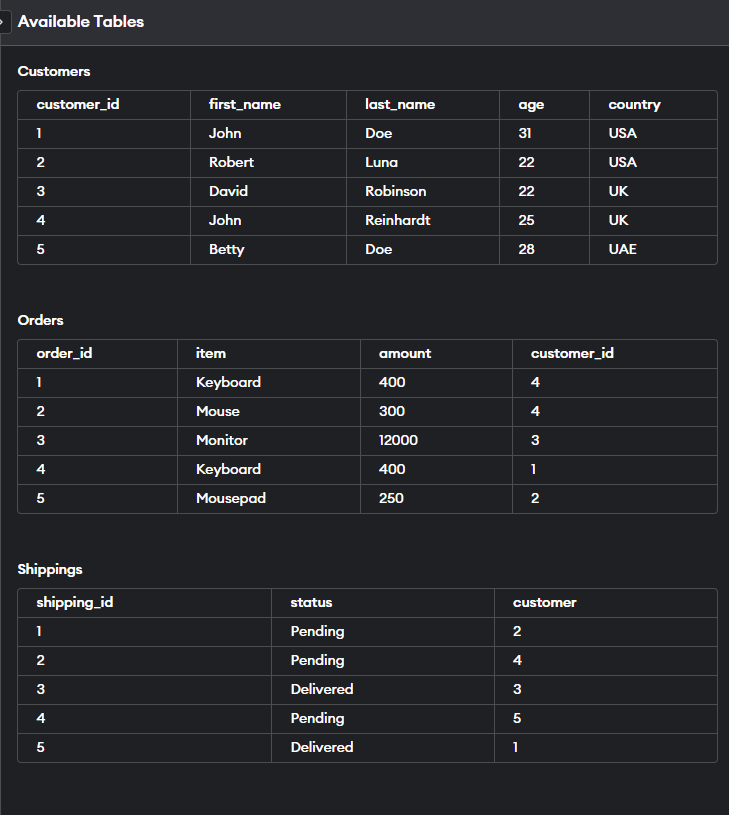

#### Q 1: FIND TOTAL COUNT OF CUSTOMER ID IN TABLE CUSTOMER?
ANS: `SELECT COUNT (CUSTOMER_id) AS TOTAL_COUNT FROM CUSTOMERS`

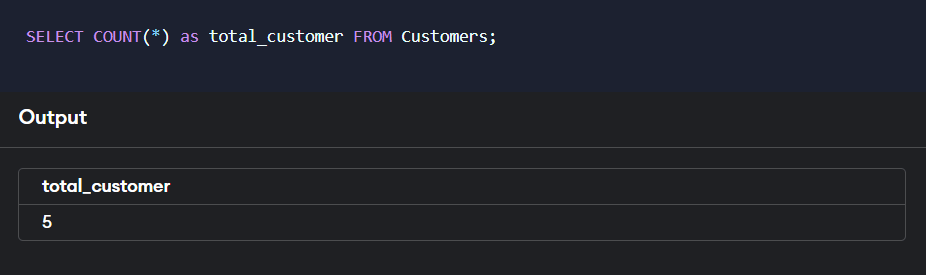

### QUE 2:FIND TOTAL Customers WHERE AGE IS GREATOR THAN 23?
ANS: `SELECT COUNT (CUSTOMER_id) AS TOTAL_COUNT FROM CUSTOMERS WHERE AGE > '23'`
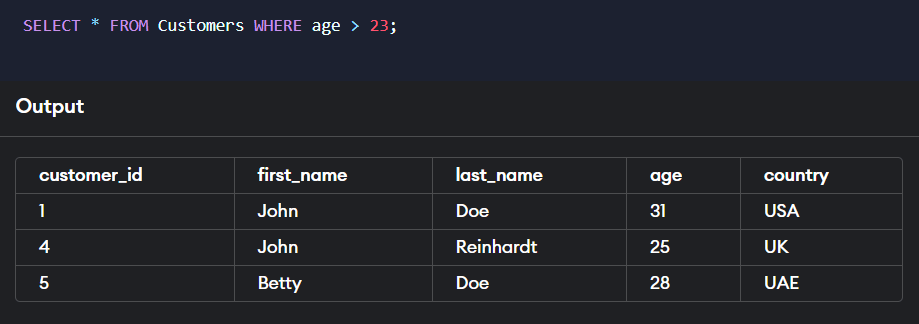


### Q3: COUNT LIST OF RECORD WHERE COUNTRY nane IS USA?
ANS: `SELECT COUNT (COUNTRY) AS TOTAL_RECORD FROM CUSTOMERS WHERE COUNTRY='USA'`
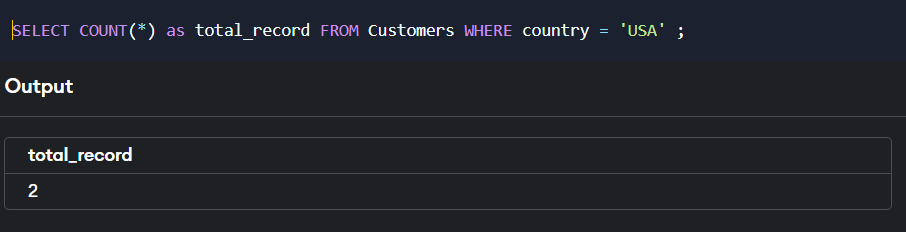

### Q4: COUNT LIST OF RECORD WHERE FIRST NAME STARTS WITH J?
ANS: `SELECT COUNT (FIRST_NAME) AS NAMES FROM CUSTOMERS WHERE FIRST_NAME LIKE 'J%'`

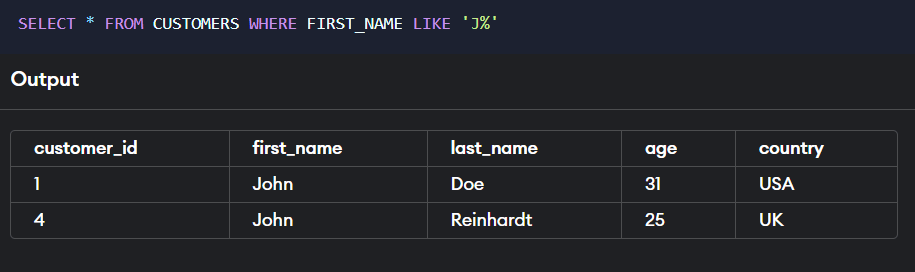

### Q5: FETCH COUNT NUMBER RECORD OF CUSTOMERS WHERE AGE LIMIT BETWEEN 20 TO 28?
ANS: `SELECT COUNT (customer_id) FROM CUSTOMERS WHERE AGE BETWEEN '25' AND '28'`
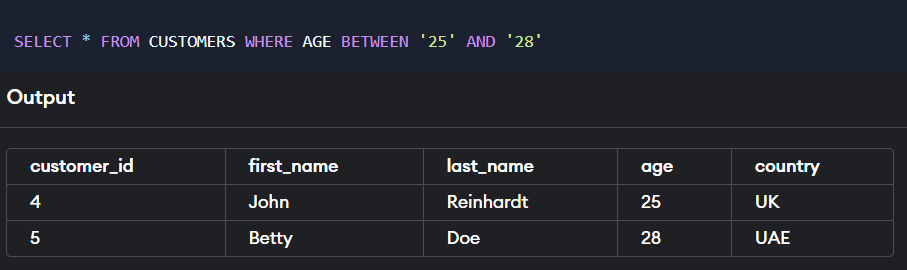

### Q5: FETCH COUNT NUMBER RECORD OF CUSTOMERS WHERE  not AGE LIMIT BETWEEN 20 TO 28?
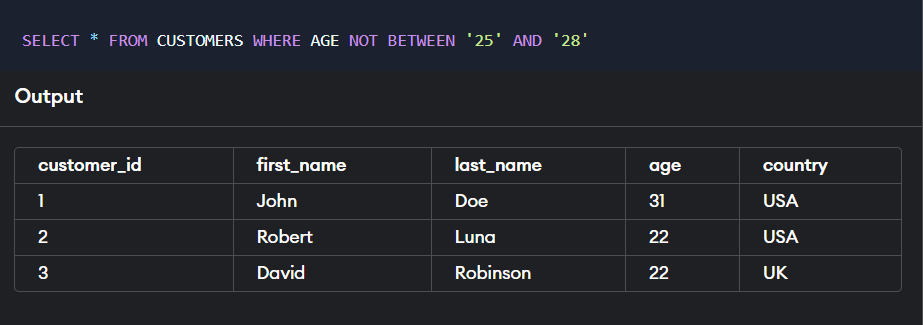

### Q6: FIND HIHGEST AGE IN CUSTOMER? 
ANS: `SELECT MAX (AGE) AS HIGH_AGE FROM CUSTOMERS`
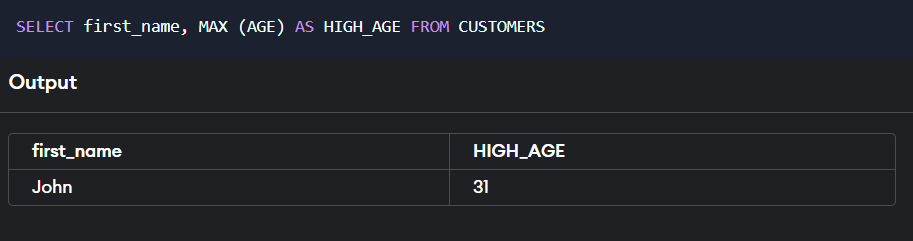

### Q7: FIND MIN AGE IN CUSTOMER? 
ANS: `SELECT MIN (AGE) AS LOW_AGE FROM CUSTOMERS`
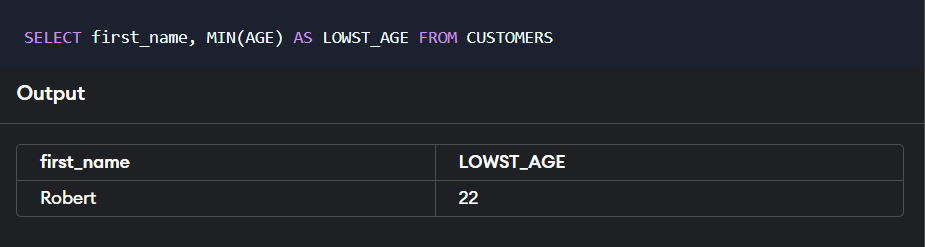

### Q8: FIND SECOND HIGHEST AGE IN CUSTOMER? 
ANS: `SELECT * FROM CUSTOMERS ORDER BY AGE DESC LIMIT 1,1 `

***NOTE : IT WILL SKIP THE FIRST VALUE AND SHOW SECOND VALUE LIKE ..AFTER SORTING***

***SECOND WAY:***

 `SELECT MAX(A.AGE) FROM CUSTOMERS A, CUSTOMERS S 
 WHERE A.AGE<S.AGE`

***BEST WAY:***

 `SELECT MAX(AGE) FROM CUSTOMERS WHERE AGE < (SELECT MAX(AGE) FROM CUSTOMERS)`

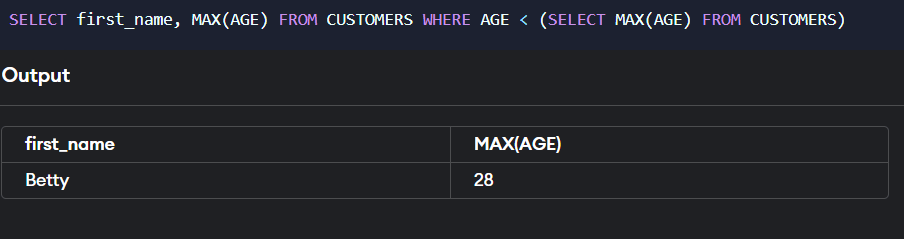

### Q9: Display customer details WHO CUSTOMERID IS 4 AND SHOW THE DETAILS FOR ALL THE CUSTOMERS WHO LIVES IN SAME COUNTRY?
***ANS:*** `SELECT * FROM CUSTOMERS WHERE COUNTRY=(SELECT COUNTRY FROM CUSTOMERS WHERE CUSTOMER_ID = '4')` 

***BEST WAY :***
  `SELECT T2.* FROM Customers T1, customerS T2
  WHERE T1.CUSTOMER_id = '4' AND T1.cOUNTRY = T2.cOUNTRY;`

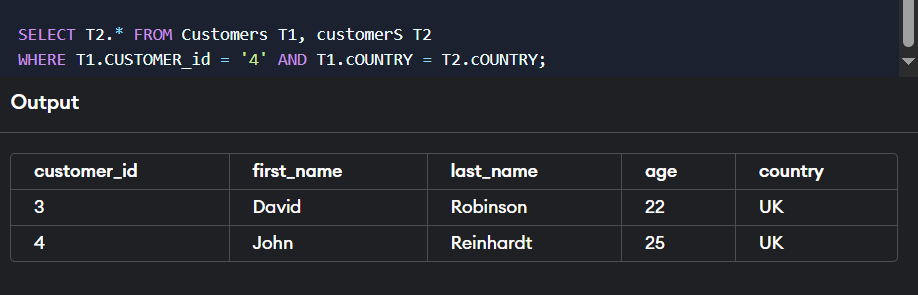

### Q10: Country wise highest AGE , LOWEST AGE?
ANS: `SELECT MAX(AGE) FROM CUSTOMERS ORDER BY FIRST_NAME`
     `SELECT MIN(AGE) FROM CUSTOMERS ORDER BY CUSTOMER_iD`

`SELECT country, MIN(AGE) AS lowest_age
FROM Customers
GROUP BY country;`
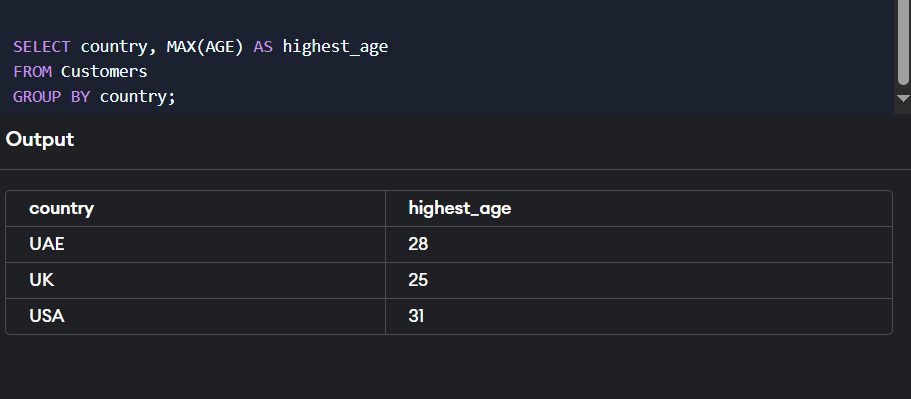


### 
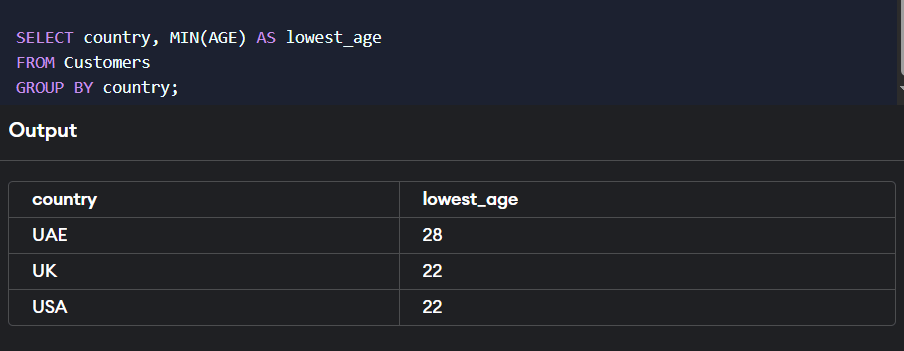

### Q11: Counts No of CUSTOMERS in each COUNTRY or counts no of ITEMS in Each OrderID
ANS : `SELECT country, COUNT(country) AS no_of_customer FROM customers GROUP BY  country`
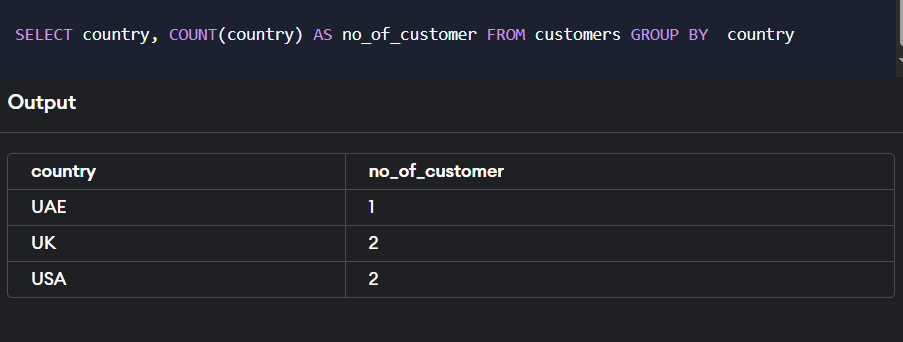

### Q12: Display Alternate Records(1,3,5 or 2,4,6) ?
ANS : `SELECT * FROM CUSTOMERS WHERE CUSTOMER_ID%2=1 (FOR ODD)`<br>
      `SELECT * FROM CUSTOMERS WHERE CUSTOMER_ID%2!=1 (FOR EVEN)`

Note:  The modulo operation on CUSTOMER_ID will not guarantee alternating records in the sequence of rows returned.
  
- Alternate records without usinf customerID

        WITH NumberedRows AS (
            SELECT *, ROW_NUMBER() OVER (ORDER BY (SELECT NULL)) AS RowNum
            FROM Customers
            )
            SELECT *
            FROM NumberedRows
            WHERE RowNum % 2 = 1;

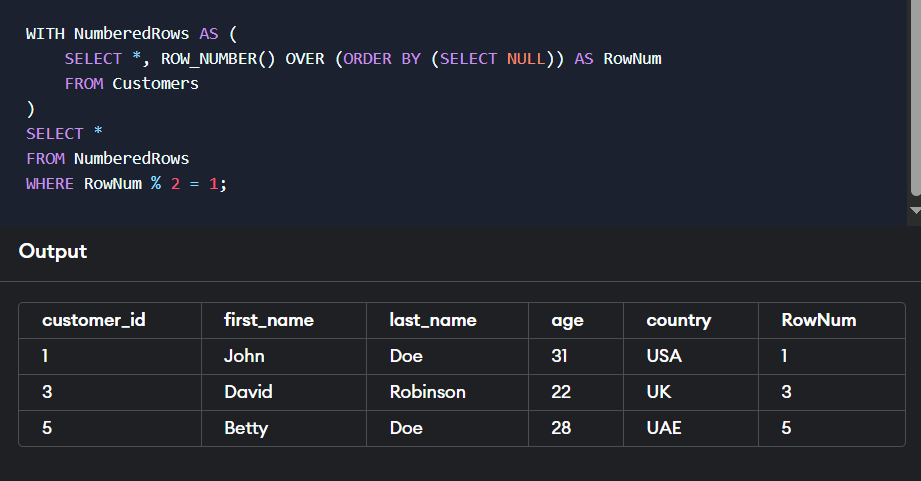

### Q13: SHOW FIRST_NAME AND LAST_NAME AND AGE BY DESC ORDER OF AGE.
ANS : `SELECT FIRST_NAME,LAST_NAME ,AGE FROM CUSTOMERS ORDER BY AGE DESC`
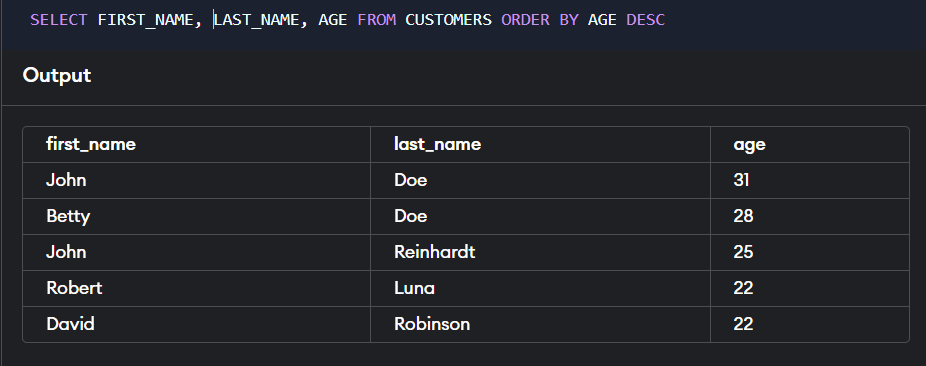

### Q14 : Display Duplicate name of a Column 
- (GROUP BY USING ALL DUPLICATE VALUES HAS BEEN REMOVED AND WE NEED TO SEARCH MORE ON IT)
- Select first_name from customers group by first_name

- Display Duplicate of a Column (NEED TO SEARCH MORE HAVING BY & GROUP BY)
    - `Select first_name,COUNT(*) from customers GROUP BY FIRST_NAME HAVING COUNT(*)>1;`

- OR (IF WE WANT TO PRINT THE FULL RECORD)

        SELECT *
        FROM CUSTOMERS
        WHERE FIRST_NAME IN (
            SELECT FIRST_NAME
            FROM CUSTOMERS
            GROUP BY FIRST_NAME
            HAVING COUNT(*) > 1
        );


        SELECT *
        FROM your_table
        WHERE column_name IN (
            SELECT column_name
            FROM your_table
            GROUP BY column_name
            HAVING COUNT(*) > 1
        );

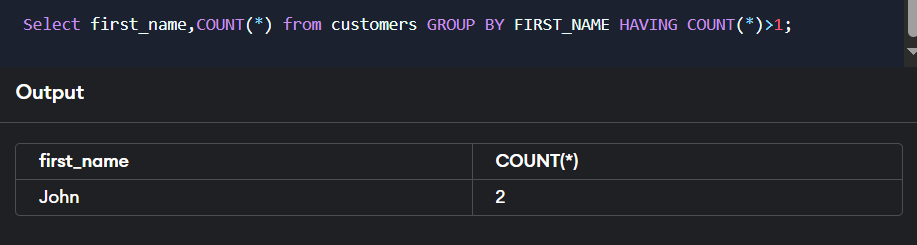

### Q15: Select first 4 row from tabel.
ANS : `SELECT * FROM CUSTOMERS LIMIT 4`
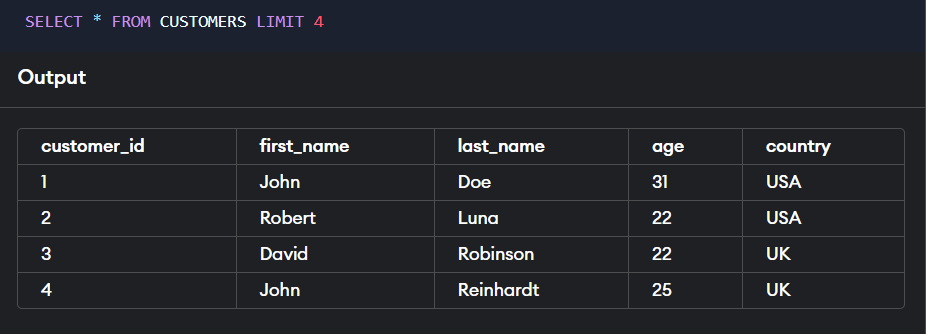

### Q16: JOINS TWO TABLE AND SHOW ALL COULUMS FOR BOTH THE TABLES AND PRINT LAST THREE LESSER AMOUNT
- ANS: 
    SELECT * FROM CUSTOMERS
    JOIN ORDERS ON CUSTOMERS.CUSTOMER_ID = ORDERS.CUSTOMER_ID 
     ORDER BY AMOUNT LIMIT 3;

NOTE : WE HAVE USE FULL JOIN HERE AND PRINT THE LOWEST THREE VALUES OF AMOUNT
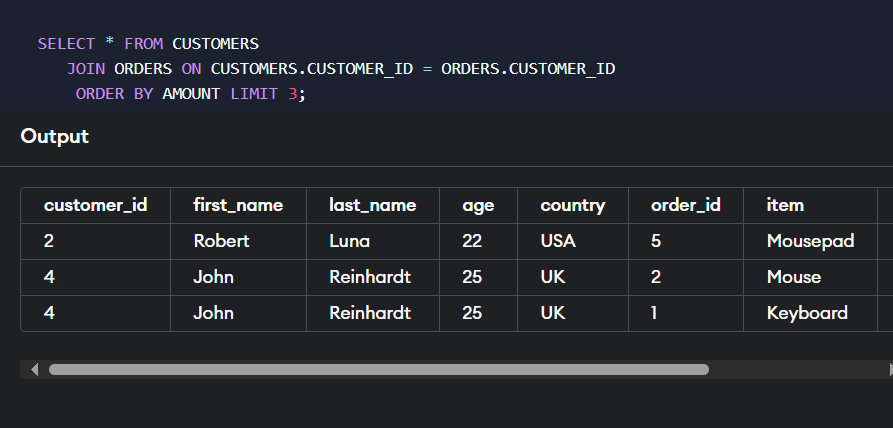

### Q17: Print FIRST_NAME , LAST_NAME AND AMOUNT WHO BROUGHT KEYBOARD
- ANS :
    - SELECT FIRST_NAME, LAST_NAME, AMOUNT 
        FROM CUSTOMERS 
        JOIN ORDERS ON CUSTOMERS.CUSTOMER_ID=ORDERS.CUSTOMER_ID 
        WHERE ITEM LIKE '%KEYBOARD%
        
 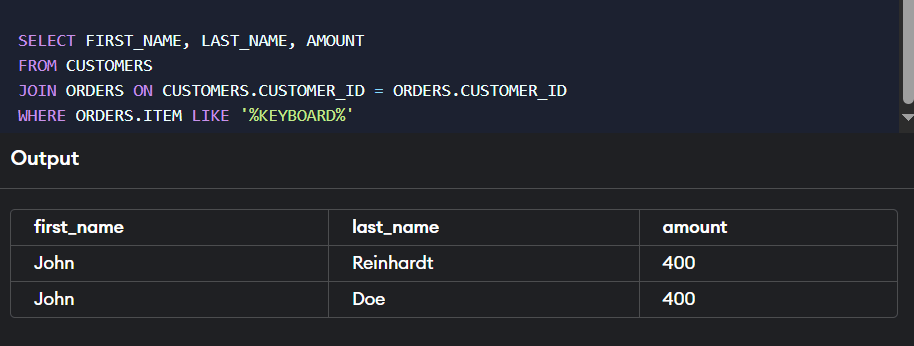

### Q18: PRINT LIST IF ITEM , PRICE WHICH IS SELLING IN USA OR UK.
- ANS: 
    - SELECT ITEM,AMOUNT
        FROM CUSTOMERS 
        JOIN ORDERS 
        ON CUSTOMERS.CUSTOMER_ID=ORDERS.CUSTOMER_ID 
        WHERE COUNTRY IN ('USA','UAE')
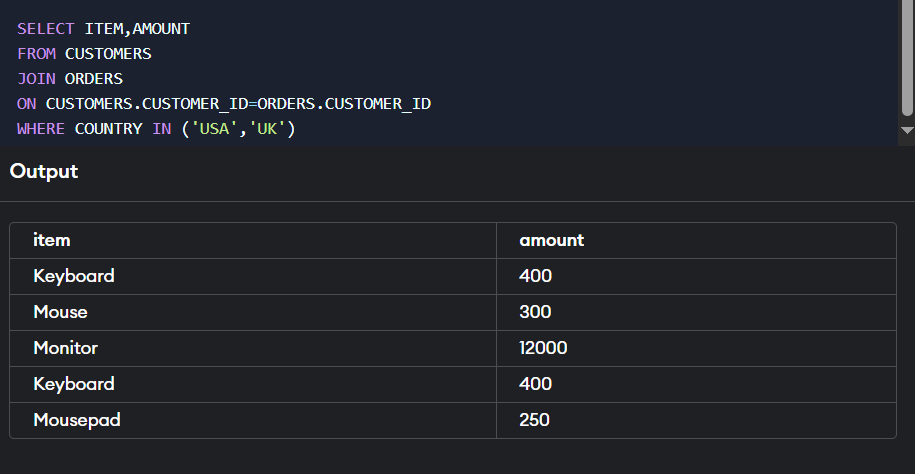

### Q 19: PRINT LIST IF ITEM , AMOUNT,COUNTRY WHICH HAS BEEN DELIVERED
- (JOINS FOR THREE TABLES)
    - ANS : SELECT ITEM,AMOUNT,COUNTRY
        FROM CUSTOMERS 
        JOIN ORDERS 
        ON CUSTOMERS.CUSTOMER_ID=ORDERS.CUSTOMER_ID 
        JOIN SHIPPINGS ON CUSTOMERs.CUSTOMER_ID=SHIPPINGS.CUSTOMER
        WHERE STATUS = 'Delivered'

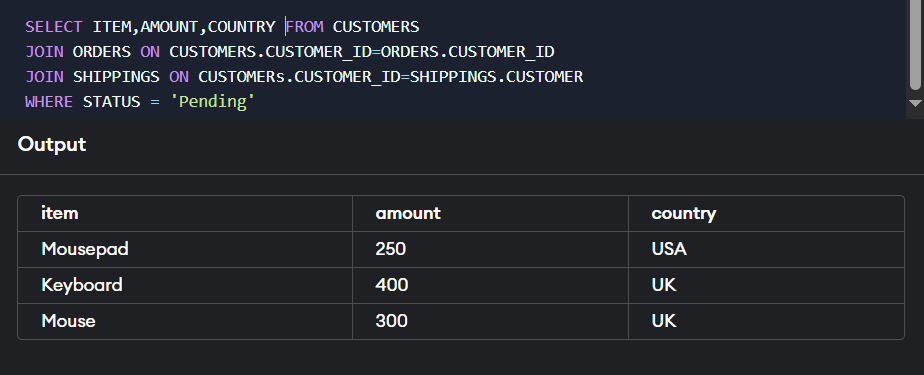

### Q20 :  union vs uninonall
- UNION (REMOVE DUPLICATES)
    - Purpose: Combines the results of two or more queries and removes duplicate rows from the final result set
    - Performance: May be slower compared to UNION ALL because it involves additional processing to remove duplicates.
        - SELECT CUSTOMER_ID FROM CUSTOMERS 
            UNION 
            SELECT CUSTOMER_ID FROM ORDERS
    - 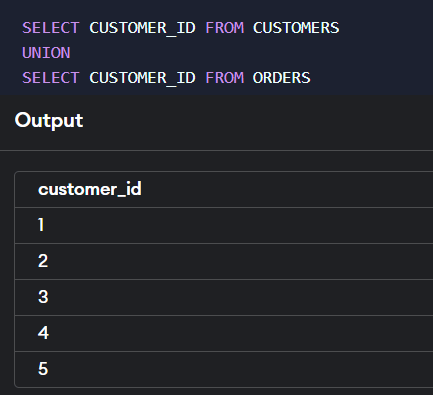
- UNION ALL (PRINT BOTH AS ITS IS)
    - Purpose: Combines the results of two or more queries without removing duplicates.
    - Performance: Generally faster than UNION because it does not perform the additional step of removing duplicates
    -SELECT CUSTOMER_ID FROM CUSTOMERS 
        UNION 
        SELECT CUSTOMER_ID FROM ORDERS
        

### UNION ALL
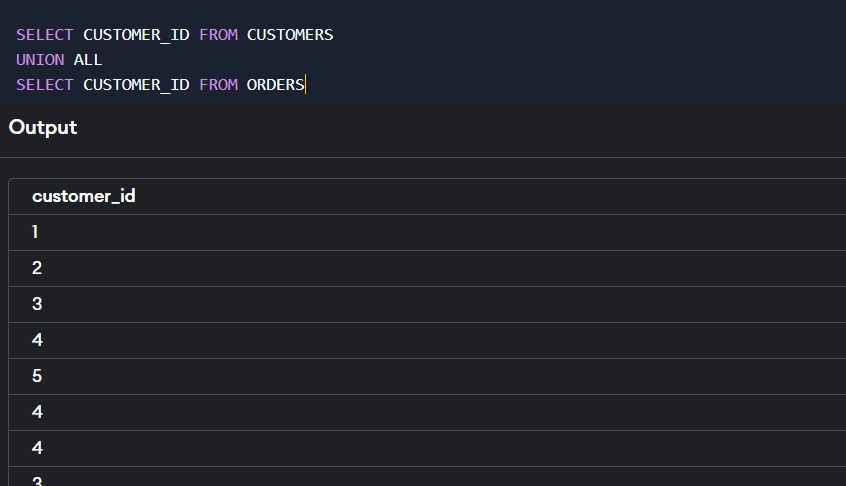

### QUE 21 : INNER JOIN - ONLY SHOWS COMMON DATA
ANS : SELECT C.CUSTOMER_ID,C.FIRST_NAME , C.LAST_NAME, C.AGE, O.ORDER_ID , O.ITEM 
FROM CUSTOMERS C
INNER JOIN ORDERS O ON C.CUSTOMER_ID=O.CUSTOMER_ID
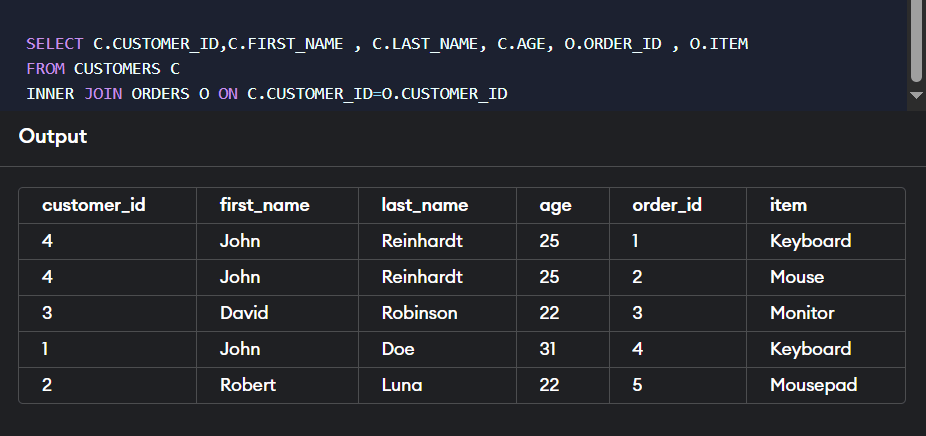
OR 



### 3
SELECT C.CUSTOMER_ID,C.FIRST_NAME , C.LAST_NAME, C.AGE, O.ORDER_ID , O.ITEM 
FROM ORDERS O, CUSTOMERS C 
WHERE O.CUSTOMER_ID=C.CUSTOMER_ID
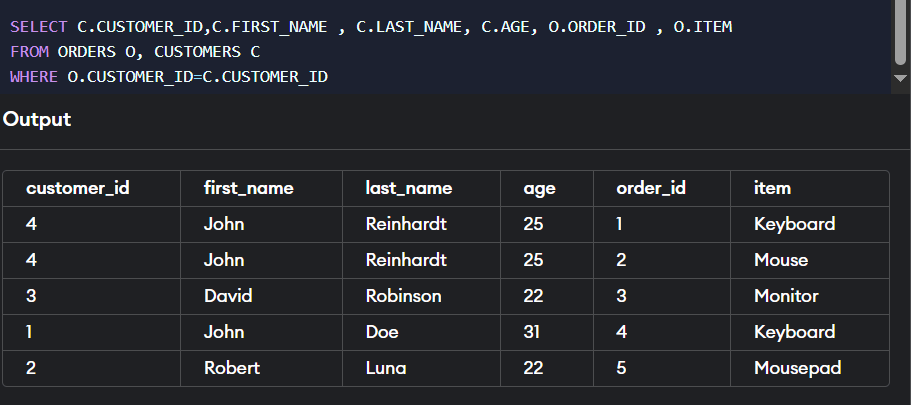

### Q 22: How can we retrieve the names of customers who share the same last name but are from different countries?
ANS : SELECT C1.FIRST_NAME,C1.LAST_NAME ,C1.COUNTRY FROM CUSTOMERS C1
JOIN CUSTOMERS C2
ON C1.LAST_NAME=C2.LAST_NAME WHERE C1.COUNTRY<>C2.COUNTRY

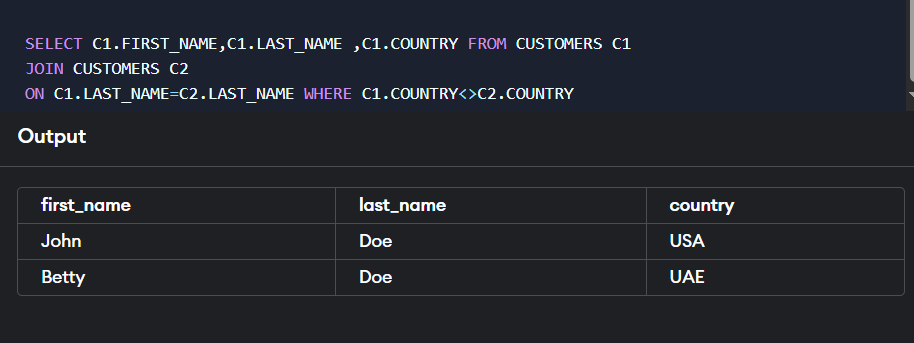

### Q 23: How can we find all customers who share the same first name and are of the same age group (within a 7-year range)?
SELECT * FROM CUSTOMERS C 
JOIN CUSTOMERS C1 ON
C.FIRST_NAME=C1.FIRST_NAME 
WHERE c.customer_id < c1.customer_id
    AND ABS(c.age - c1.age) < 5;
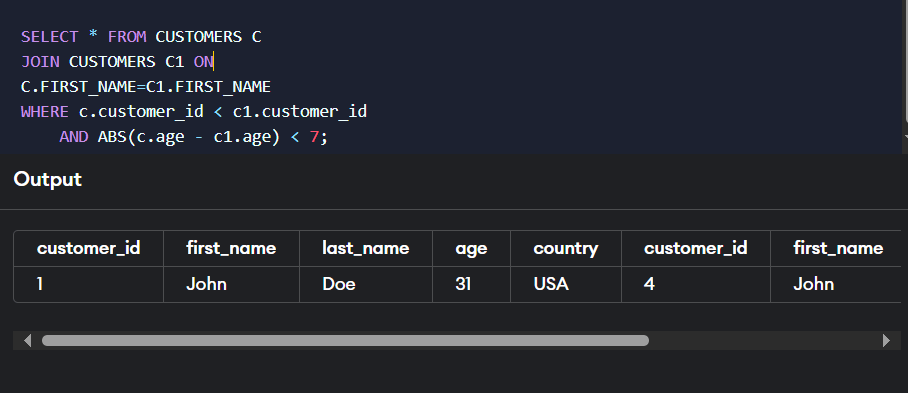

### Q 24: HOW TO FIND LAST ROW
SELECT * FROM `table_name` WHERE id=(SELECT MAX(id) FROM `table_name`);
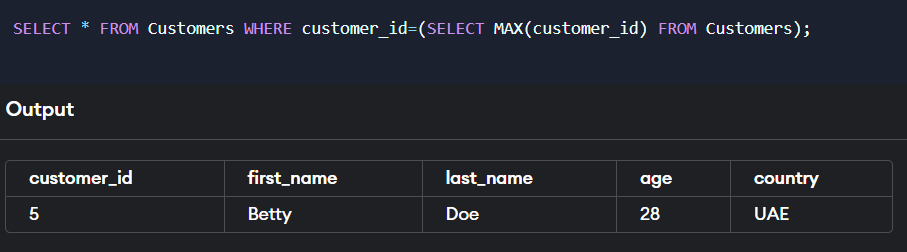

### QUE 25 : HOW TO FETCH DATA USING LEFT JOIN
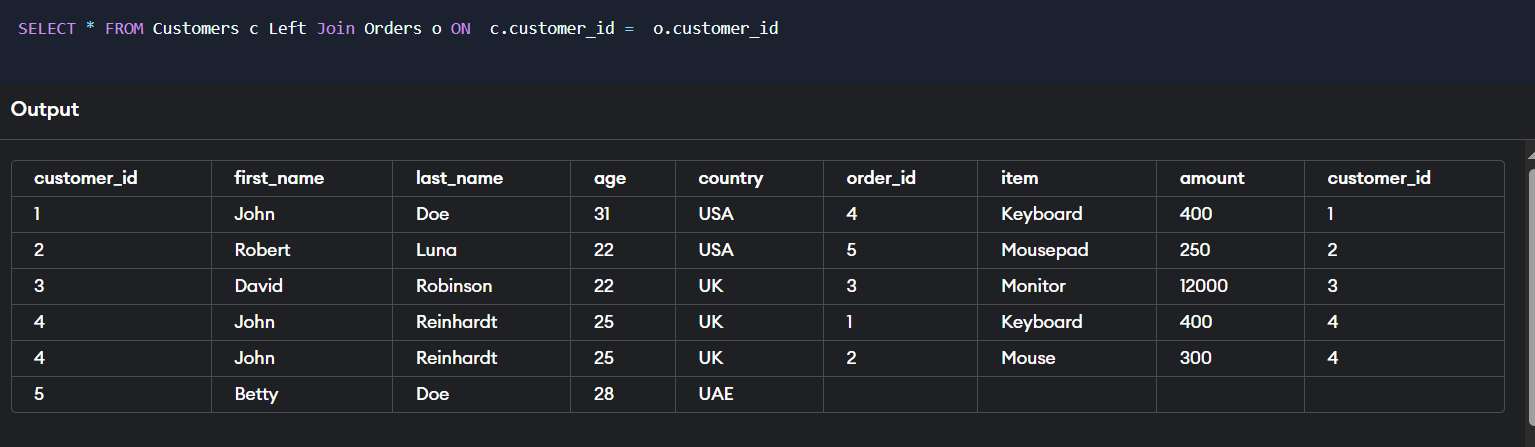

### QUE 25: HOW TO FIND